# Seminar 5

## Intro into ML

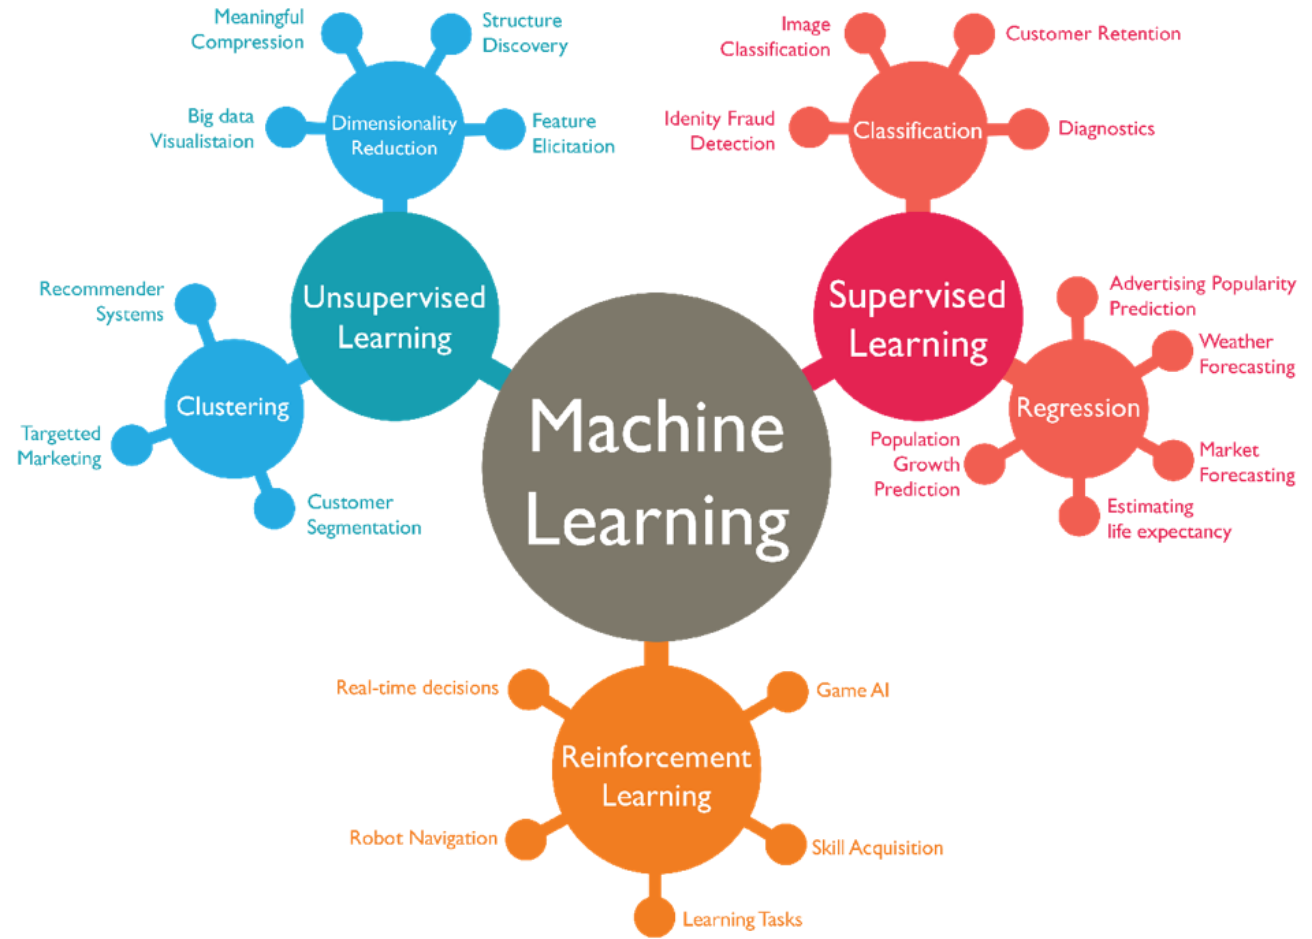

## Linear regression

Advantages:

*   Easy to use (not many hyperparameters to tune)
*   Easy to interpret (why does the model predict this value?)
*   More compex algorithms are based on it
*   Do not require a lot of resources (fast computation, not a lot of memory)
*  Has probabilistic interpretation (can test hypothesis, compute confidence intervals)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Let's work with data about sales and advertisements.


*   *Sales* - sales of a product (in thousands of items);
*   *TV* - money spent on advertisements on TV (in thousands of dollars);
*   *Radio* - money spent on advertisements on radio (in thousands of dollars);
*   *Newspaper* - money spent on advertisements in newspapers (in thousands of dollars);



In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-python-mirec/dap_mirec_2022/main/seminar9/Advertising.csv', index_col=0)
data.head()

*Sales* - **target** variable. We are going to check, how other variables influence it.

*TV, Radio, Newspaper* - **features**, which may influence the target.

In [ ]:
data.shape

We have 200 samples in the dataset.

Let's visually check if there are dependencies.

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ax1 = data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], c='deepskyblue')
ax2 = data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1], c='palevioletred')
ax3 = data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2], c='yellowgreen')
ax1.title.set_text('Dependence of sales on TV advertising')
ax2.title.set_text('Dependence of sales on radio advertising')
ax3.title.set_text('Dependence of sales on newspaper advertising')
plt.show()

Most likely, the company will want to know, how to spend money on advertisements in the future.

This general question may lead you to more specific questions:



*   Is there a connection between advertisements and sales?
*   How strong is the connection?
*   Which type of advertisement is the most effective?
*   Can we predict sales given the expenses on each type of the advertisements?

Let's try to do it



## Simple Linear Regression

Simple linear regression (SLR) is a linear regression model with a single feature
$y = \beta_0 + \beta_1 x$


*   $y$ - target (numerical)
*   $x$ - feature (numerical)
*   $\beta_0$ - intercept
*   $\beta_1$ - coefficient of the independent variable $x$

So, we want to draw a straight line on the scatterplot that reflect data the best.

$\beta_0, \beta_1$ - **coefficients of the model**. The model learn their values during training.



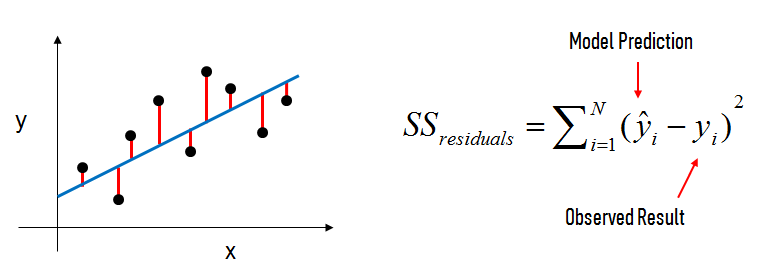


In the figure above:

*   Points are the data we have
*   Blue line - the model
*   Red lines - residuals

Coefficients of the model are:

*   $\beta_0$ - point where the line interset Oy (where $x=0$)
*   $\beta_1$ - the slope of the line





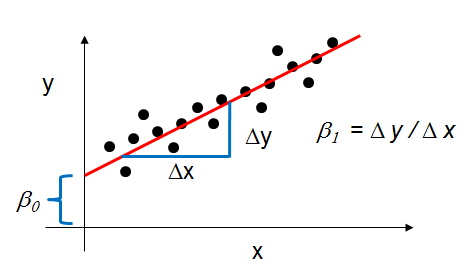

### Fitting the model

Let's build the linear regression using `statsmodels` library. Let's check, how sales depend on TV (the dependency was visible on the scatterplot)

In [ ]:
import statsmodels.formula.api as smf

#create the model using the formula and the data.fit()
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

#coefficients
lm.params

`formula` argument need to contain the formula we want to use, the string `'Sales ~ TV'` means $Sales = \beta_0 + \beta_1 TV$.


More info about formulas can be found [here](https://patsy.readthedocs.io/en/latest/formulas.html).

### Interpreting the model

Let's interpret the coefficients:

If no money is spend on TV advertisement, the Sales are 7.032594. Additional 1 000 \$ on TV advertisements will increase Sales by 47.537 items.


Note: if increasing TV advertisements had lead to decreasing Sales, the coefficient $\beta_1$ would have been negative.

### Predicting

Let's try to predict Sales. Company decided to spend 50 (thousand dollars) on TV advertisement, how many goods will they sall?

Use the formula:

$y = \beta_0 + \beta_1 TV$

$y = 7.032594 + 0.047537 \times 50$

In [ ]:
y = 7.032594 + 0.047537 * 50
y

So, approximately 9409 items will be sold.

We also can use the model from the library:

In [ ]:
# the model take DataFrame as input, so we need to construct it
X_new = pd.DataFrame({'TV': [50]})

# use the model to make predictions on a new value
lm.predict(X_new)

### Visualizing

Let's plot the line. We can predict for the smallest and biggest values and connect the points

In [ ]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

In [ ]:
preds = lm.predict(X_new)
preds

In [ ]:
plt.figure(figsize=(6, 4))
plt.title('Visualizing the predictions')

plt.scatter(data.TV, data.Sales, c='deepskyblue')
plt.plot(X_new, preds, c='palevioletred', linewidth=2)
plt.xlabel('Sales')
plt.ylabel('TV')
plt.show()

## Loss functions, Metrics

We created a model and we need to understan, how good is it?

For regression:

Mean squared error:

$$MSE(y, \hat{y}) = \frac{1}{l}\sum_{i=1}^l (y_i - \hat{y_i})^2$$

It may be hard to interpret it becaue it is squared, so we can compute root mean squared error:

$$RMSE(y, \hat{y}) = \sqrt{MSE(y, \hat{y})}$$

It still may be hard to work because we need to know the scale of data (if we predict cost of the house in dollars, RMSE = 5, will be good, but if we predict size of an ant in cm, it will be huge)


Another metric is coefficient of determination (also called R-squared):

$$R^2 = 1 - \frac{\sum_i(y_i - \hat{y}_i)^2}{\sum_i(y_i - \overline{y})^2}$$

The closer $R^2$ is to 1, the better the model is.


Also, there is mean absolute error:

$$MAE(y, \hat{y}) = \frac{1}{l}\sum_{i=1}^l |y_i - \hat{y_i}|$$


In [ ]:
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
pred = lm.predict(data['TV'])

r_2 = lm.rsquared
mse = ((data['Sales'] - pred) ** 2).mean()
rmse = mse ** 0.5
mae = (data['Sales'] - pred).abs().mean()

print('R^2 =  {}'.format(r_2))
print('MSE =  {}'.format(mse))
print('RMSE =  {}'.format(rmse))
print('MAE =  {}'.format(mae))

So, are the metrics good? Hard to say, threshold for good $R^2$ depends on the data, area, etc.  It is better used as a tool to compare models.

## Multiple linear regression

Now, let's check if Sales depend on many features.

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_d x_d$

where $x_1, ..., x_d$ are the features of a sample

For our data:

$Sales = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

In [ ]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

lm.params

We have a new model, let's check the metrics:

In [ ]:
pred = lm.predict(data)

r_2 = lm.rsquared
mse = ((data['Sales'] - pred) ** 2).mean()
rmse = mse ** 0.5
mae = (data['Sales'] - pred).abs().mean()

print('R^2 =  {}'.format(r_2))
print('MSE =  {}'.format(mse))
print('RMSE =  {}'.format(rmse))
print('MAE =  {}'.format(mae))

All the metrics are better, is seems that this new model is better at explaining the Sales.

## Importance of features

In our model the coefficient for Newspaper is negative, so advertisements in Newspaper decrease the Sales. This may seem illogical. Why did this happen?


Because coefficients are calculating using data and it is noisy. The coefficients are random variables, so it may be an accident.


Let's check the summary about the model that helps to draw conclusions about the feature.

In [ ]:
lm.summary()

The 95\% confidence interval for Newspaper contain 0, so, it is likely that this feature has no real influence on the Sales.

Let's conduct an experiment: add random features to the model

In [ ]:
np.random.seed(0)

data_new = data.copy()
data_new['Random1'] = np.random.normal(loc=5, size=len(data))
data_new['Random2'] = np.random.uniform(len(data))
data_new['Random3'] = np.random.normal(loc=3, size=len(data))

lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper + Random1 + Random2 + Random3', data=data_new).fit()
lm.summary()

We can see, that the random features are still assigned some coefficients because model

In [ ]:
plt.scatter(data_new['Random1'], data_new['Sales'])

Can we find out, which features are the most important ones using coefficients of the model?

In [ ]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

lm.params

It may seem that Radio is the most important feature because the absolute value of the coefficient is bigger BUT the features may have diffent scales and it will influence the  result.

Let's change the scale of Radio, it is in thousands of dollars now, but what if we had it just in dollars?

In [ ]:
data_new = data.copy()
data_new['Radio_dollars'] = data_new['Radio'] * 1_000
lm = smf.ols(formula='Sales ~ TV + Radio_dollars + Newspaper', data=data_new).fit()

lm.params

Now, the coefficient is tiny comapred to others

In [ ]:
from scipy.stats import zscore

data_new['Radio'] = zscore(data_new['Radio'])
data_new['TV'] = zscore(data_new['TV'])
data_new['Newspaper'] = zscore(data_new['Newspaper'])

lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data_new).fit()

lm.params

In [ ]:
data_new.describe()

Now, the scales of all features and it is possible to compare.

## Categorical features

We worked with numerical features, but what about categorical?

For example, we may have information if the market is in urban, suburban or rural area.

In [ ]:
np.random.seed(10)
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums >= 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

How to add it to the model?

In [ ]:
data['Area'].value_counts()

Idea #1 (Ordinal encoding): Let's just replace categories with some number (like rural - 0, suburban - 1, urban - 2)

Problem: assume rural < suburbal < urban, the order may not be there. It may work for ordinal, but not for nominal.


Idea #2 (One hot encoding): For every category create a separate feature, that is 1 if the sample has the category (features 'Area_rural', 'Area_suburban', 'Area_rural')

In [ ]:
data['Area_rural'] = (data['Area'] == 'rural').astype('int')
data['Area_suburban'] = (data['Area'] == 'suburban').astype('int')
data['Area_urban'] = (data['Area'] == 'urban').astype('int')
data.sample(4)

Possible problem: excessive information. Easy to see, that these features will always contain one 1 and two 0. So, we do not really need all 3.

In [ ]:
data.drop(columns=['Area_rural', 'Area_suburban', 'Area_urban'], inplace=True)
area_dummies = pd.get_dummies(data.Area).iloc[:, 1:]

data = pd.concat([data, area_dummies], axis=1)
data.head()

So, we do not need the initial `'Area'` feature.

In [ ]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper + suburban + urban', data=data).fit()
lm.rsquared

In [ ]:
lm.summary()

## Sklearn

Library for machine learning.

Documentation is [here](https://scikit-learn.org/stable/).



*   ML models (Linear regression, ...)
*   Metrics (MSE, MAE, ...)
*   Preprocessing (scalers, encoders)
*   Other useful things



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler


ohe = OneHotEncoder(drop='first')
#fit the encoder
ohe.fit(data[['Area']])
#transform data
X_categorical = ohe.transform(data[['Area']]).toarray()

sc = StandardScaler()
sc.fit(data[['Newspaper', 'Radio', 'TV']])
X_numerical = sc.transform(data[['Newspaper', 'Radio', 'TV']])

y = data['Sales']
X = np.concatenate([X_numerical, X_categorical], axis=1)

X.shape

In [ ]:
lr = LinearRegression()
lr.fit(X, y)
y_pred  = lr.predict(X)
mean_squared_error(y, y_pred)

## Overfitting

Let's consider an example: $y = cos(1.5\pi x)$ (the real dependency)

There is always some noise in the real data, so $\tilde{y}_i = y(x_i) + \mathcal{N}(0, 0.01)$.



In [ ]:
np.random.seed(36)

#true function
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)

#observations
x_objects = np.random.uniform(0, 1, size=30)
y_objects = np.cos(1.5 * np.pi * x_objects) + np.random.normal(scale=0.1, size=x_objects.shape)

plt.scatter(x_objects, y_objects)
plt.plot(x, y)

Let's fir linear regression:

In [ ]:
regr = LinearRegression().fit(x_objects.reshape((-1, 1)), y_objects)

print('MSE = ', mean_squared_error(y_objects, regr.predict(x_objects.reshape((-1, 1)))))

plt.scatter(x_objects, y_objects)
plt.plot(x, y)
plt.plot(x, regr.predict(x.reshape((-1, 1))), label='Prediction')

plt.legend()

How can we make it better? Can we add more features?

Common technique is adding polynomial and interaction features: features [a, b] + degree=2 will be features [1, a, b, a^2, ab, b^2]

Let's try  using $\{x, x^2, x^3, x^4\}$ (add features to degree 4)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


degree = 4
X_objects = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
X = PolynomialFeatures(degree, include_bias=False).fit_transform(x[:, None])
regr = LinearRegression().fit(X_objects, y_objects)
y_pred = regr.predict(X)
print('MSE = ', mean_squared_error(y_objects, regr.predict(X_objects)))

plt.plot(x, y, label="Real function")
plt.scatter(x_objects, y_objects, label="Data")
plt.plot(x, y_pred, label="Prediction")

plt.legend()

Looks excellent! 4 seems to be a very good degree for this data.

But that if we add more? Like $\{x, \dots, x^{20}\}$

In [ ]:
degree = 20
X_objects = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
X = PolynomialFeatures(degree, include_bias=False).fit_transform(x[:, None])
regr = LinearRegression().fit(X_objects, y_objects)
y_pred = regr.predict(X)
print('MSE = ', mean_squared_error(y_objects, regr.predict(X_objects)))

plt.plot(x, y, label="Real function")
plt.scatter(x_objects, y_objects, label="Data")
plt.plot(x, y_pred, label="Prediction")
plt.ylim(-2, 2)
plt.legend()

What is going on? - Overfitting: good results on the training data, bad on new (test)


How to spot - check the test data + big coefficients

In [ ]:
regr.coef_

How to tackle? Check test data, use regularization

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_objects[:, None], y_objects, test_size=0.3, random_state=0)

In [ ]:
degree = 4
pf = PolynomialFeatures(degree, include_bias=False).fit(X_train)

X_train_pf = pf.transform(X_train)
X_test_pf  = pf.transform(X_test)

regr = LinearRegression().fit(X_train_pf, y_train)
y_pred_train = regr.predict(X_train_pf)
y_pred_test  = regr.predict(X_test_pf)

X = pf.transform(x[:, None])
y_pred = regr.predict(X)

print('Train MSE = ', mean_squared_error(y_train, y_pred_train))
print('Test  MSE = ', mean_squared_error(y_test,  y_pred_test))


plt.plot(x, y, label="Real function")
plt.scatter(X_train[:,0], y_train, label="Train data")
plt.scatter(X_test[:,0], y_test, label="Test  data")
plt.plot(x, y_pred, label="Prediction")
plt.ylim(-2, 2)
plt.legend()

In [ ]:
degree = 20
pf = PolynomialFeatures(degree, include_bias=False).fit(X_train)

X_train_pf = pf.transform(X_train)
X_test_pf  = pf.transform(X_test)

regr = LinearRegression().fit(X_train_pf, y_train)
X = pf.transform(x[:, None])
y_pred = regr.predict(X)

print('Train MSE = ', mean_squared_error(y_train, y_pred_train))
print('Test  MSE = ', mean_squared_error(y_test,  y_pred_test))


plt.plot(x, y, label="Real function")
plt.scatter(X_train[:,0], y_train, label="Train data")
plt.scatter(X_test[:,0], y_test, label="Test  data")
plt.plot(x, y_pred, label="Prediction")
plt.ylim(-2, 2)
plt.legend()

For 20 features  the MSE is HUGE, it is clear that the model is overfitted.

## Regularization

$L_2$-regularization:

$Q_{reg}(X, y, a) = Q(X, y, a) +  \alpha \|w\|_2^2$



$L_1$-regularization:

$Q_{reg}(X, y, a) = Q(X, y, a) +  \alpha \|w\|_1$

where $Q(X, y, a)$ is the loss function used in the model (MSE in linear regression) and $w$ are the coefficients of the model

$\alpha$ - the hyperparameter - the strength of the regularization (the bigger, the more strict)

In [ ]:
X_train_pf.shape

In [ ]:
from sklearn.linear_model import Ridge, Lasso

#L2
regr = Ridge(alpha=0.1).fit(X_train_pf, y_train)
y_pred_train = regr.predict(X_train_pf)
y_pred_test  = regr.predict(X_test_pf)
X = pf.transform(x[:, None])
y_pred = regr.predict(X)

print('Train MSE = ', mean_squared_error(y_train, y_pred_train))
print('Test  MSE = ', mean_squared_error(y_test,  y_pred_test))


plt.plot(x, y, label="Real function")
plt.scatter(X_train[:,0], y_train, label="Train data")
plt.scatter(X_test[:,0], y_test, label="Test  data")
plt.plot(x, y_pred, label="Prediction")
plt.ylim(-2, 2)
plt.legend()

In [ ]:
#L1
regr = Lasso(alpha=0.001).fit(X_train_pf, y_train)
y_pred_train = regr.predict(X_train_pf)
y_pred_test  = regr.predict(X_test_pf)
X = pf.transform(x[:, None])
y_pred = regr.predict(X)

print('Train MSE = ', mean_squared_error(y_train, y_pred_train))
print('Test  MSE = ', mean_squared_error(y_test,  y_pred_test))


plt.plot(x, y, label="Real function")
plt.scatter(X_train[:,0], y_train, label="Train data")
plt.scatter(X_test[:,0], y_test, label="Test  data")
plt.plot(x, y_pred, label="Prediction")
plt.ylim(-2, 2)
plt.legend()

The MSE on train is bigger, but on test is much better (and close to train).